In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/MyDrive/kaggle_dataset'


In [4]:
%cd /content/gdrive/MyDrive/kaggle_dataset

/content/gdrive/MyDrive/kaggle_dataset


In [5]:
!ls

animals10.zip  kaggle.json  model.png


In [6]:
!kaggle datasets download -d alessiocorrado99/animals10

401 - Unauthorized


In [7]:
import zipfile
Zip_ref = zipfile.ZipFile("/content/gdrive/MyDrive/kaggle_dataset/animals10.zip")
Zip_ref.extractall("/tmp")
Zip_ref.close()

In [8]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras import utils
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [9]:
data_dir ="/tmp/raw-img"

In [10]:
print(os.listdir("/tmp/raw-img"))

['pecora', 'mucca', 'farfalla', 'cane', 'elefante', 'scoiattolo', 'cavallo', 'gallina', 'ragno', 'gatto']


In [11]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 26179 files belonging to 10 classes.


In [12]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [13]:
train_ds = data.take(train_size)
val_ds = data.skip(train_size).take(val_size)
test_ds = data.skip(train_size+val_size).take(test_size)

In [14]:
data_augmentation = Sequential([
    keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(256,256,3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1)
])

In [15]:
model = Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 3)))
model.add(data_augmentation)
model.add(keras.layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 16)    

In [17]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
history = model.fit(train_ds, batch_size = 32, epochs = 25, validation_data=val_ds, validation_steps=1)

Epoch 1/25
573/573 [==============================] - 47s 62ms/step - loss: 1.8492 - accuracy: 0.3801 - val_loss: 2.0110 - val_accuracy: 0.4062
Epoch 2/25
573/573 [==============================] - 35s 61ms/step - loss: 1.4130 - accuracy: 0.5112 - val_loss: 1.6417 - val_accuracy: 0.5000
Epoch 3/25
573/573 [==============================] - 35s 60ms/step - loss: 1.2143 - accuracy: 0.5814 - val_loss: 1.6247 - val_accuracy: 0.4688
Epoch 4/25
573/573 [==============================] - 35s 60ms/step - loss: 1.0844 - accuracy: 0.6281 - val_loss: 1.1473 - val_accuracy: 0.5938
Epoch 5/25
573/573 [==============================] - 34s 60ms/step - loss: 0.9824 - accuracy: 0.6658 - val_loss: 1.3311 - val_accuracy: 0.5938
Epoch 6/25
573/573 [==============================] - 35s 60ms/step - loss: 0.9151 - accuracy: 0.6890 - val_loss: 2.2265 - val_accuracy: 0.5000
Epoch 7/25
573/573 [==============================] - 35s 60ms/step - loss: 0.8500 - accuracy: 0.7087 - val_loss: 1.1625 - val_accuracy:

In [19]:
score = model.evaluate(val_ds)
print("Total loss on validation set:", score[0])
print("Accuracy of validation set:", score[1])

score = model.evaluate(train_ds)
print("Total loss on training set: ", score[0])
print("Accuracy of training set: ", score[1])

163/163 [==============================] - 10s 17ms/step - loss: 0.9291 - accuracy: 0.7423
Total loss on validation set: 0.9290838837623596
Accuracy of validation set: 0.7423312664031982
573/573 [==============================] - 9s 15ms/step - loss: 0.5449 - accuracy: 0.8252
Total loss on training set:  0.5448733568191528
Accuracy of training set:  0.8252072334289551


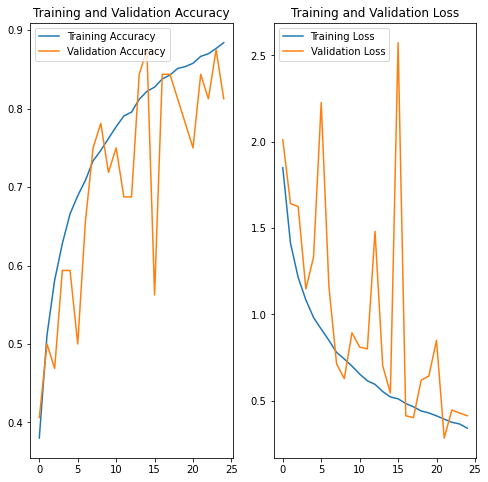

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(25)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
score = model.evaluate(test_ds)
print("Total loss on testing set: ", score[0])
print("Accuracy of testing set: ", score[1])

81/81 [==============================] - 10s 16ms/step - loss: 0.9649 - accuracy: 0.7346
Total loss on testing set:  0.9649220108985901
Accuracy of testing set:  0.7345678806304932
